<a href="https://colab.research.google.com/github/mbgu/explanatorydataanalysis/blob/main/explanatorydataanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('adult.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
              'occupation', 'relationship','race', 'sex', 'capital-gain', 'capital-loss',
              'hours-per-week', 'native-country', 'salary']
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Salary Distribution:


 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

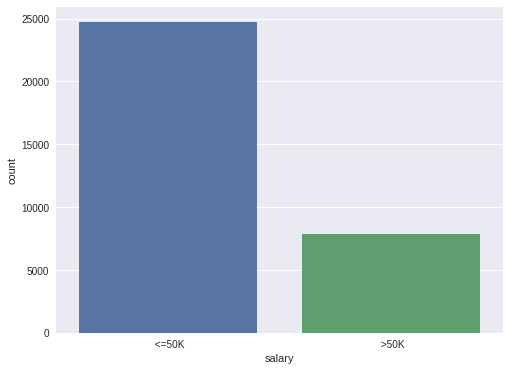

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(df['salary'])
print('Salary Distribution:')
df['salary'].value_counts()

In [ ]:
print("Maaşı 50K'dan düşük olanların yaş karakteristiği:")
print(df[df['salary'] == ' <=50K'].age.describe())
print('')
print("Maaşı 50K'dan yüksek olanların yaş karakteristiği:")
print(df[df['salary'] == ' >50K'].age.describe())

Maaşı 50K'dan düşük olanların yaş karakteristiği:
count    24720.000000
mean        36.783738
std         14.020088
min         17.000000
25%         25.000000
50%         34.000000
75%         46.000000
max         90.000000
Name: age, dtype: float64

Maaşı 50K'dan yüksek olanların yaş karakteristiği:
count    7841.000000
mean       44.249841
std        10.519028
min        19.000000
25%        36.000000
50%        44.000000
75%        51.000000
max        90.000000
Name: age, dtype: float64


 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

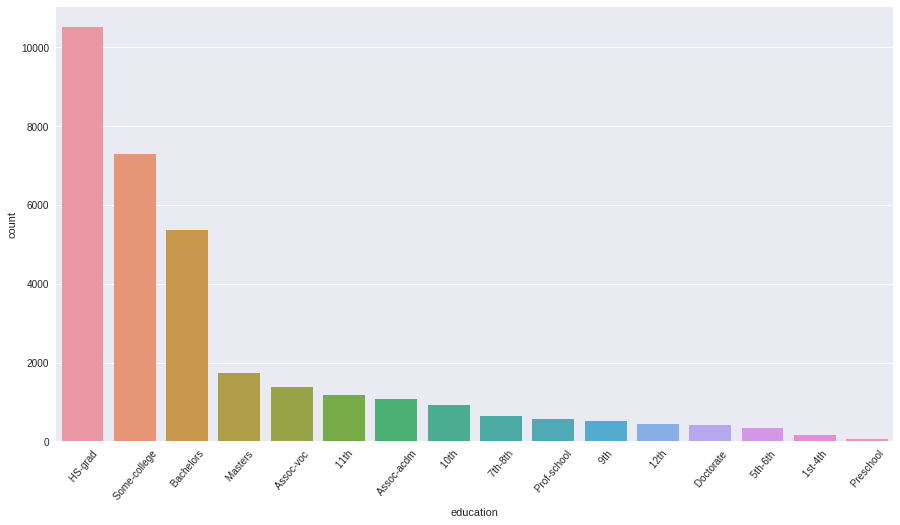

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(df['education'], order = df['education'].value_counts().index)
plt.xticks(rotation=50)
df['education'].value_counts()

In [ ]:
df.groupby('education')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,933.0,37.429796,16.720713,17.0,22.00,34.0,52.0,90.0
11th,1175.0,32.355745,15.545485,17.0,18.00,28.0,43.0,90.0
12th,433.0,32.000000,14.334625,17.0,19.00,28.0,41.0,79.0
1st-4th,168.0,46.142857,15.615625,19.0,33.00,46.0,57.0,90.0
5th-6th,333.0,42.885886,15.557285,17.0,29.00,42.0,54.0,84.0
7th-8th,646.0,48.445820,16.092350,17.0,34.25,50.0,61.0,90.0
9th,514.0,41.060311,15.946862,17.0,28.00,39.0,54.0,90.0
Assoc-acdm,1067.0,37.381443,11.095177,19.0,29.00,36.0,44.0,90.0
Assoc-voc,1382.0,38.553546,11.631300,19.0,30.00,37.0,46.0,84.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

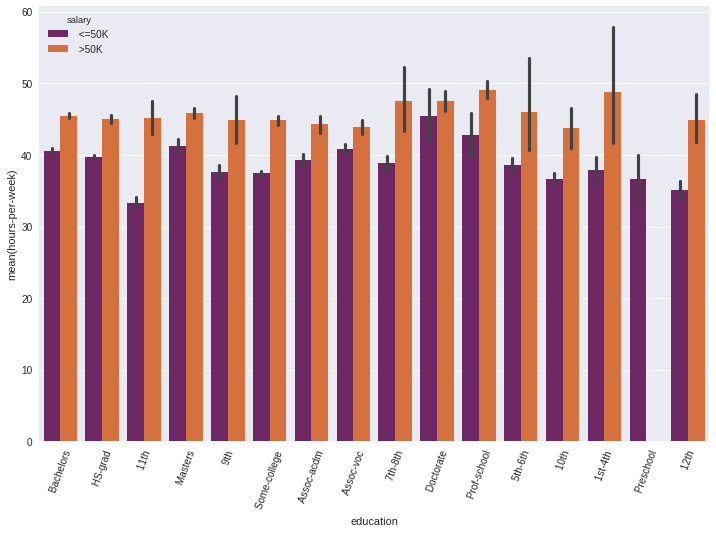

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x="education", y="hours-per-week", data=df, hue="salary", palette='inferno')
plt.xticks(rotation=70)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

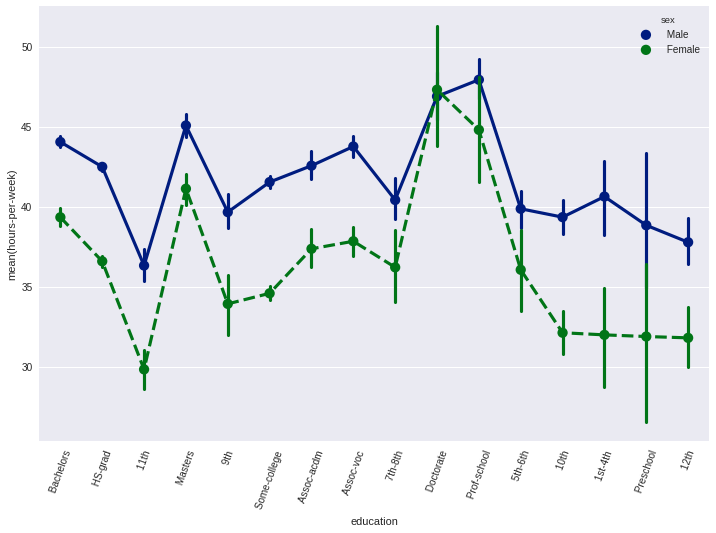

In [ ]:
plt.figure(figsize=(12,8))
sns.pointplot(x="education", y="hours-per-week", hue='sex', palette="dark",
              linestyles=["-", "--"], data=df)
plt.xticks(rotation=70)

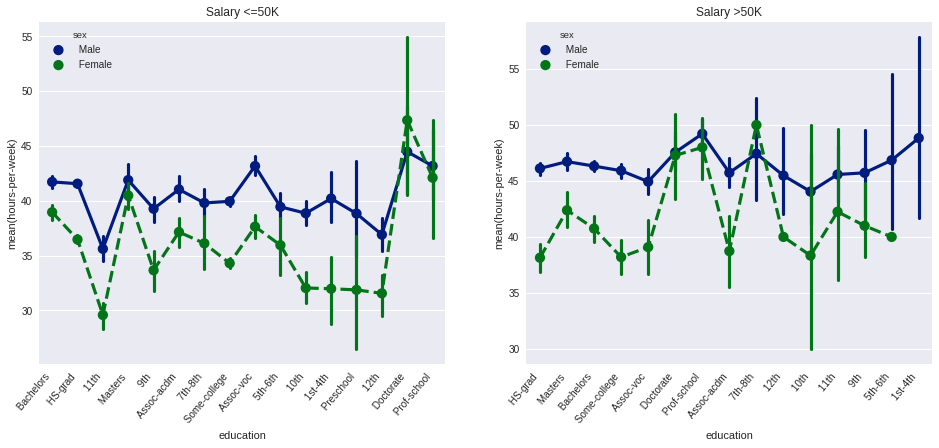

In [ ]:
f, (ax1, ax2) =plt.subplots(1,2,figsize=(16,7))
sns.pointplot(x="education", y="hours-per-week", hue='sex', palette="dark",
              linestyles=["-", "--"], data=df[df['salary']==' <=50K'], ax=ax1)
ax1.set_title('Salary <=50K')
sns.pointplot(x="education", y="hours-per-week", hue='sex', palette="dark",
              linestyles=["-", "--"], data=df[df['salary']==' >50K'], ax=ax2)
ax2.set_title('Salary >50K')
f.autofmt_xdate(rotation=50)